In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Section1: Data Exploration 
---
1. Renamed columns 
2. Convert Accuracy to float64
3. Address missing value in productivity and utilisation % (filled with mean value)
4. Visualisation to study the distribution of numerical data (normalised skewed column)
5. Parsed market & conducted encoding (the encoding portion can potentially be used for matching model, if needed, it is not used in the following part)
6. Correlation analysis among the 4 numerical columns 
7. Scaled all 4 columns to ensure the range of the value is very close to one another 

In [3]:
moderator = pd.read_excel("sample_data.xlsx", sheet_name=1)
moderator.head()

,moderator,market,Productivity,Utilisation %,handling time,accuracy
0,1689841547143170,"[""SA"", ""OM"", ""BH"", ""QA"", ""JO"", ""IQ"", ""KW"", ""EG...",286.217674,0.812403,123549,-
1,1686755036370945,"[""RO""]",174.560000,0.704833,25547,0.959
2,1741913197768705,"[""VN""]",334.376000,0.819167,50794,1
3,1743415203890193,"[""MX"", ""UY"", ""CL"", ""AR"", ""CO"", ""EC"", ""PE"", ""BR""]",452.277500,0.775474,89626,0.941
4,1710346282427393,"[""PH""]",612.312500,0.843229,98066,0.887


In [4]:
moderator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   moderator      1414 non-null   int64  
 1   market         1414 non-null   object 
 2   Productivity   1285 non-null   float64
 3   Utilisation %  1285 non-null   float64
 4   handling time  1414 non-null   int64  
 5    accuracy      1414 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 66.4+ KB


In [5]:
# rename columns 
moderator = moderator.rename(columns={'Utilisation %': 'Utilisation_%', 'handling time': 'Handling_time',' accuracy ':'Accuracy'})

In [6]:
# Change Accuracy from object to value 
moderator['Accuracy'] = pd.to_numeric(moderator['Accuracy'], errors='coerce')

# Calculate the mean of the column
column_mean = moderator['Accuracy'].mean()

# Replace NaN values with the calculated mean
moderator['Accuracy'].fillna(column_mean, inplace=True)


In [7]:
# handle missing values in utilisaion % and handling time 
cols = ['Productivity','Utilisation_%']
for col in cols: 
    column_mean = moderator[col].mean()
    moderator[col].fillna(column_mean, inplace=True)


In [8]:
moderator.describe()

,moderator,Productivity,Utilisation_%,Handling_time,Accuracy
count,1.414000e+03,1414.000000,1414.000000,1.414000e+03,1414.000000
mean,1.073880e+15,366.484054,0.722875,9.681603e+04,0.853531
std,8.371512e+14,170.307383,0.188214,3.572110e+05,0.121786
min,1.003316e+06,0.540000,0.000000,0.000000e+00,0.250000
25%,6.955122e+06,261.674375,0.681149,4.913700e+04,0.797000
50%,1.695067e+15,362.949231,0.762312,8.135100e+04,0.892000
75%,1.736353e+15,446.047500,0.843051,1.000525e+05,0.939000
max,1.774284e+15,1323.355000,1.287250,9.443621e+06,1.000000


In [9]:
moderator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   moderator      1414 non-null   int64  
 1   market         1414 non-null   object 
 2   Productivity   1414 non-null   float64
 3   Utilisation_%  1414 non-null   float64
 4   Handling_time  1414 non-null   int64  
 5   Accuracy       1414 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 66.4+ KB


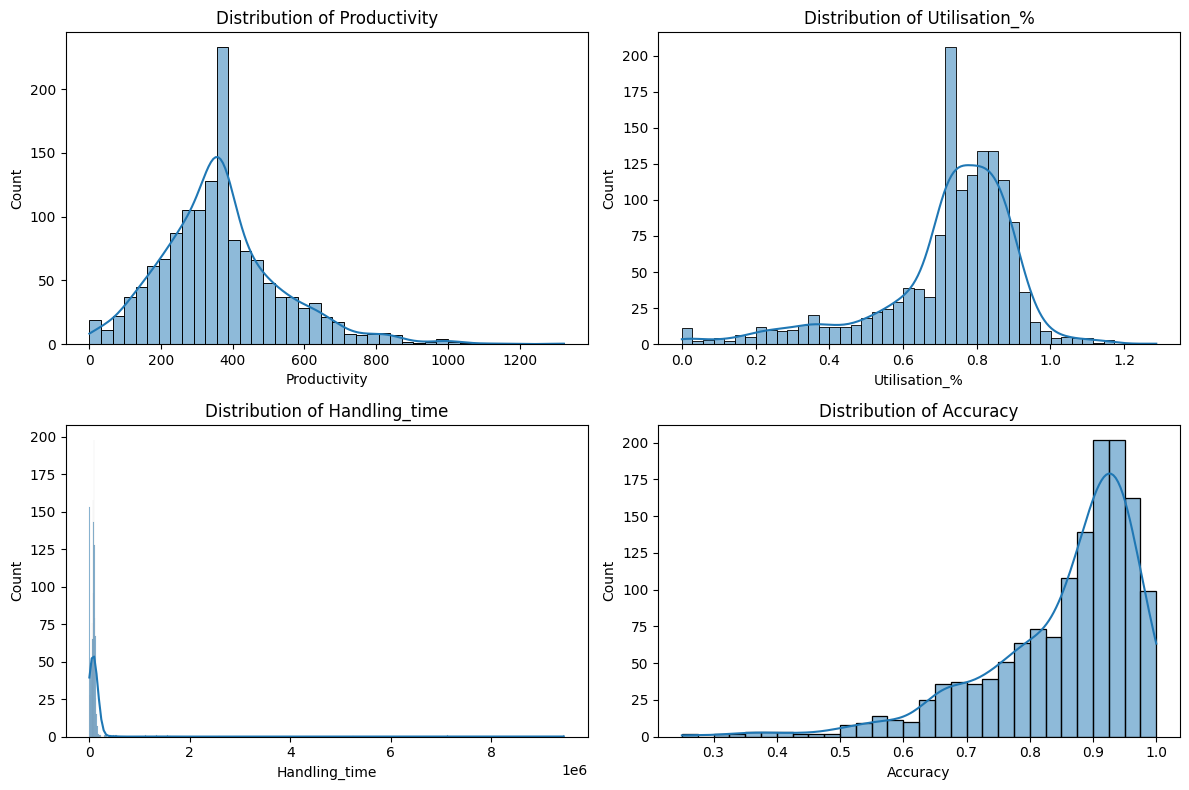

In [10]:
# Visualisation 
numerical_columns = ['Productivity','Utilisation_%','Handling_time','Accuracy']

# Create subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a distribution plot
for i, column in enumerate(numerical_columns):
    sns.histplot(moderator[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Observation: 
1. Productivity follows a normal distribution (slighly left skwed). The range of the data is wide 
2. Utilisation_% follows a normal distribution 
3. Accuracy is highly right skewed (we do expect moderator to have good accuracy)
4. Handling time is highly left skewed --> we might consider normalise the data 

/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_3301/3776268634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((moderator['Handling_time'].dropna()), ax=axs[0])
/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_3301/3776268634.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

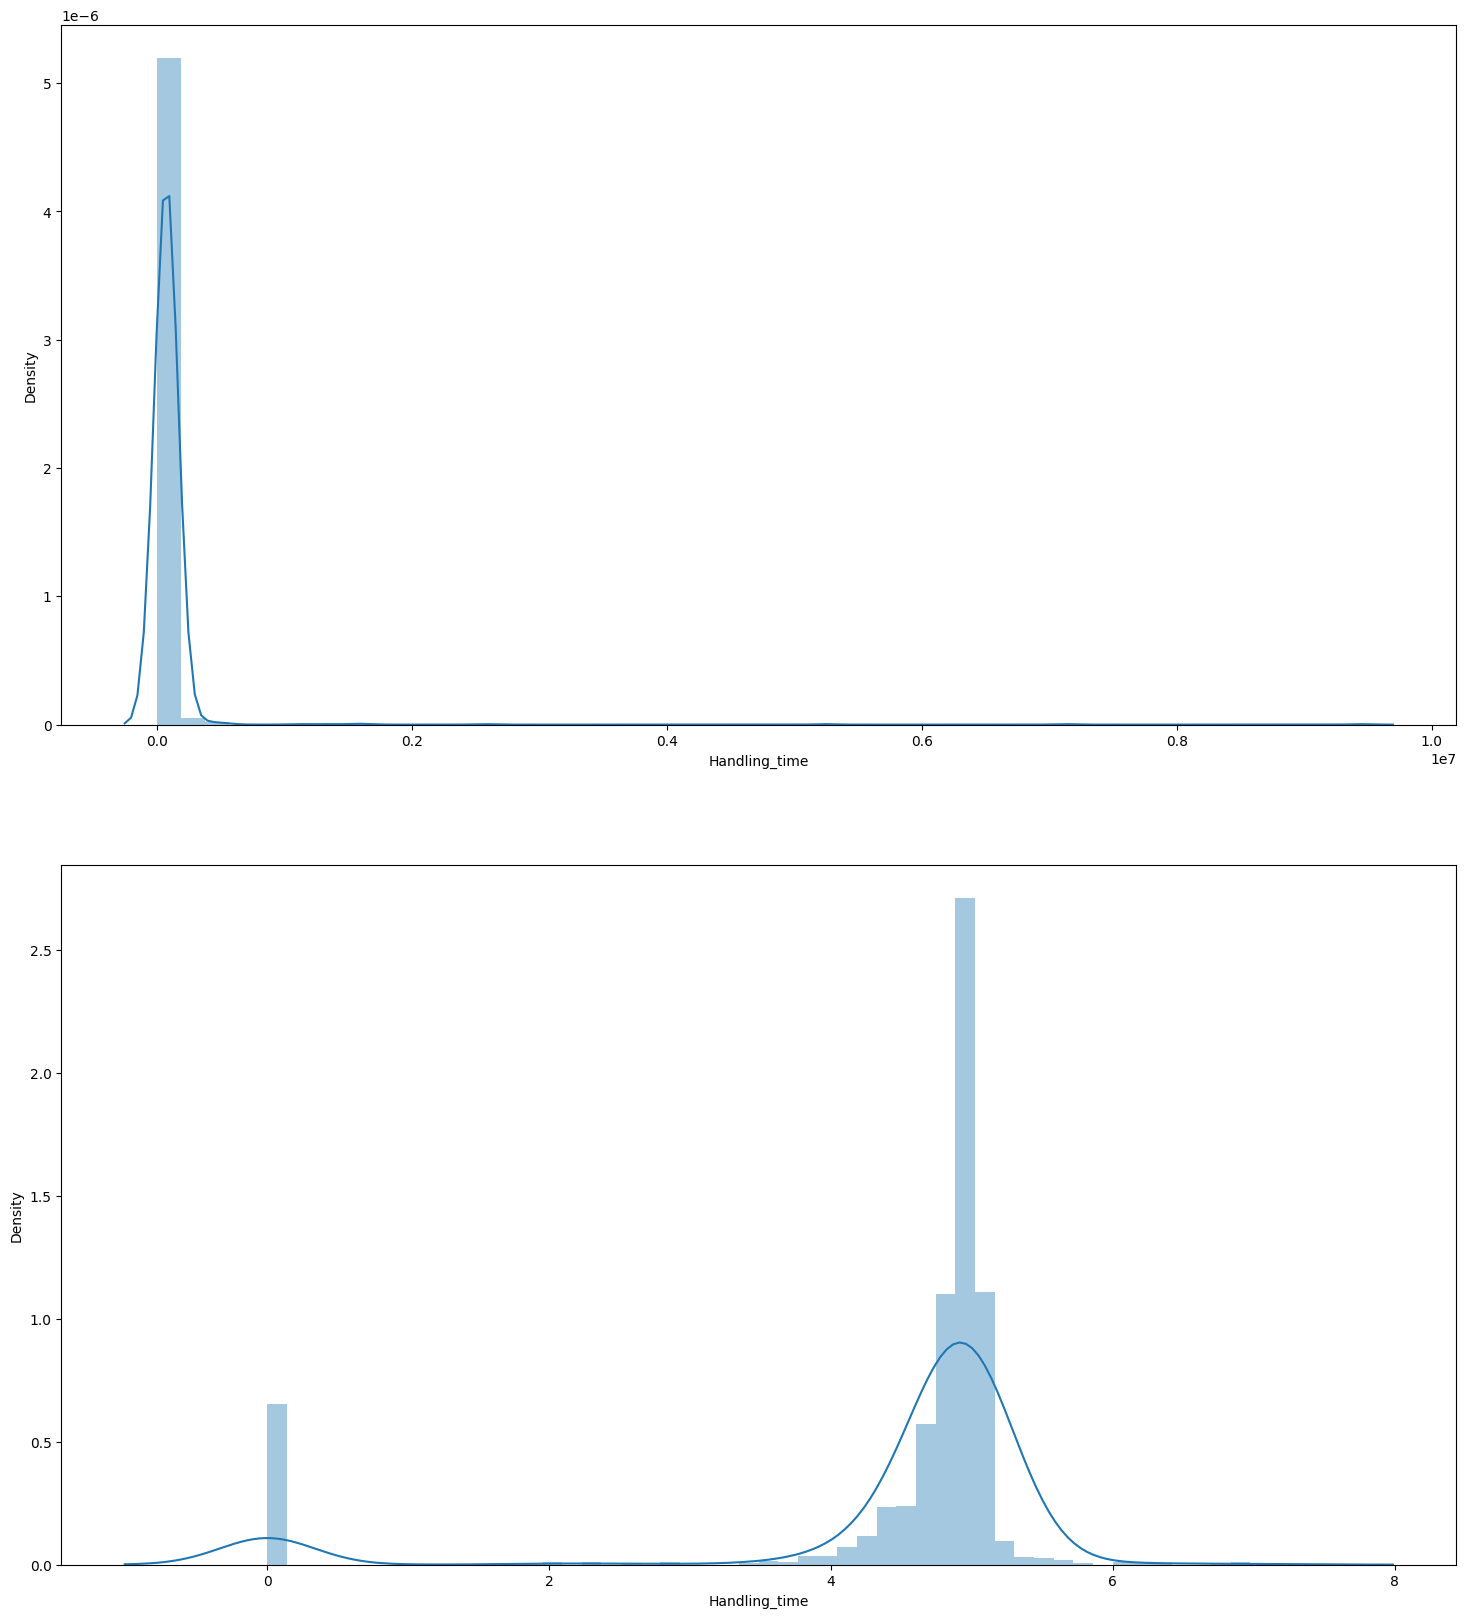

In [11]:
# attempt to normalise data 
fig, axs = plt.subplots(nrows=2, figsize=(18, 20))
sns.distplot((moderator['Handling_time'].dropna()), ax=axs[0])
sns.distplot((np.log10(moderator['Handling_time'] + 1).dropna()), ax=axs[1])
plt.show()

As normalisation seems to work for handling time, we shall normalise the handling time 

In [12]:
moderator['Handling_time_Normalised'] = np.log10(moderator['Handling_time'] + 1)
moderator.head()

,moderator,market,Productivity,Utilisation_%,Handling_time,Accuracy,Handling_time_Normalised
0,1689841547143170,"[""SA"", ""OM"", ""BH"", ""QA"", ""JO"", ""IQ"", ""KW"", ""EG...",286.217674,0.812403,123549,0.853531,5.091843
1,1686755036370945,"[""RO""]",174.560000,0.704833,25547,0.959000,4.407357
2,1741913197768705,"[""VN""]",334.376000,0.819167,50794,1.000000,4.705821
3,1743415203890193,"[""MX"", ""UY"", ""CL"", ""AR"", ""CO"", ""EC"", ""PE"", ""BR""]",452.277500,0.775474,89626,0.941000,4.952439
4,1710346282427393,"[""PH""]",612.312500,0.843229,98066,0.887000,4.991523


Next, we shall parse out the market array 

In [13]:
import ast
# Parse the "market" column into a list
moderator['market'] = moderator['market'].apply(lambda x: ast.literal_eval(x))

In [14]:
# Encoding with python dummies 
encoded_market = pd.get_dummies(moderator['market'].apply(pd.Series).stack()).groupby(level=0).sum()

# Concatenate the one-hot encoded DataFrame with the original DataFrame
moderator = pd.concat([moderator, encoded_market], axis=1)

moderator.head()

,moderator,market,Productivity,Utilisation_%,Handling_time,Accuracy,Handling_time_Normalised,AE,AR,AT,...,TH,TN,TR,TW,UA,US,UY,UZ,VN,ZA
0,1689841547143170,"[SA, OM, BH, QA, JO, IQ, KW, EG, LB]",286.217674,0.812403,123549,0.853531,5.091843,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1686755036370945,[RO],174.560000,0.704833,25547,0.959000,4.407357,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1741913197768705,[VN],334.376000,0.819167,50794,1.000000,4.705821,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1743415203890193,"[MX, UY, CL, AR, CO, EC, PE, BR]",452.277500,0.775474,89626,0.941000,4.952439,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1710346282427393,[PH],612.312500,0.843229,98066,0.887000,4.991523,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df = moderator[['moderator', 'market','Productivity', 'Utilisation_%', 'Accuracy', 'Handling_time_Normalised']] # created a copy of moderator and drop the original handling time 
df.head()

,moderator,market,Productivity,Utilisation_%,Accuracy,Handling_time_Normalised
0,1689841547143170,"[SA, OM, BH, QA, JO, IQ, KW, EG, LB]",286.217674,0.812403,0.853531,5.091843
1,1686755036370945,[RO],174.560000,0.704833,0.959000,4.407357
2,1741913197768705,[VN],334.376000,0.819167,1.000000,4.705821
3,1743415203890193,"[MX, UY, CL, AR, CO, EC, PE, BR]",452.277500,0.775474,0.941000,4.952439
4,1710346282427393,[PH],612.312500,0.843229,0.887000,4.991523


In [16]:
# Correlation Analysis 
df.drop(columns=["moderator","market"],inplace=True)


/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_3301/1227652842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["moderator","market"],inplace=True)


                          Productivity  Utilisation_%  Accuracy  \
Productivity                  1.000000       0.373665  0.128647   
Utilisation_%                 0.373665       1.000000  0.209205   
Accuracy                      0.128647       0.209205  1.000000   
Handling_time_Normalised      0.072276       0.077064  0.067232   

                          Handling_time_Normalised  
Productivity                              0.072276  
Utilisation_%                             0.077064  
Accuracy                                  0.067232  
Handling_time_Normalised                  1.000000  


<Axes: >

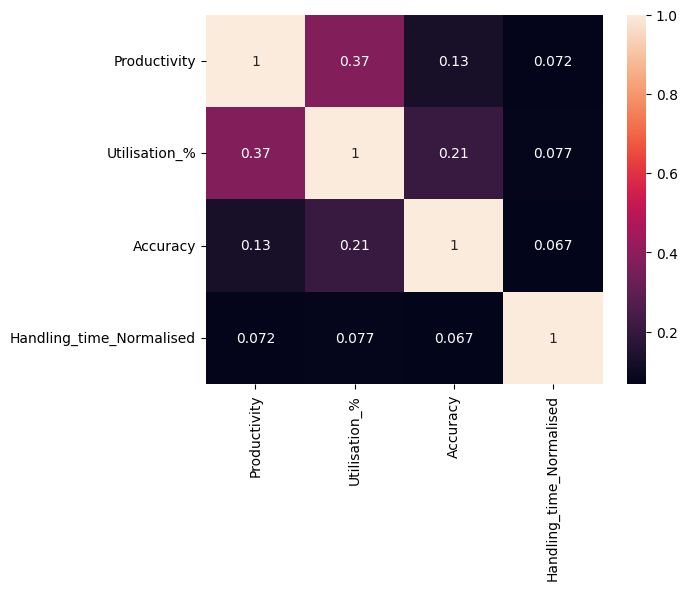

In [17]:
print(df.corr())
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})

Observation: 
1. From above, correlation between any of the 2 attributes seems small (< 0.5). 
2. Utilisation % and Productivity have the strongest correlation --> If a moderator spend more working time on reviewing, it means he or she is more productive. 

In [18]:
# Scaled all data as the range for columns are v different 
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Now, 'scaled_df' contains the standardized data
scaled_df.head()

,Productivity,Utilisation_%,Accuracy,Handling_time_Normalised
0,-0.471470,0.475842,-9.119424e-16,0.469460
1,-1.127326,-0.095890,8.663273e-01,-0.006397
2,-0.188597,0.511790,1.203103e+00,0.201096
3,0.503935,0.279564,7.184744e-01,0.372546
4,1.443950,0.639682,2.749159e-01,0.399718


P.S.: Please feel free to conduct more feature engineering

# SECTION 2: Scoring Model 
---

In [19]:
scaled_df.insert(0, 'Constant', 1)

# Convert the DataFrame to a NumPy matrix
moderator_matrix = scaled_df.to_numpy()

In [20]:
def transform(result):
    return  1 / (1 + np.exp(-result))

def moderator_score(data,beta, e):
    raw_score = np.dot(data, beta) + e 
    return transform(raw_score) # to ensure the output is between 0 and 1 


## Justification for beta:
---
We will generate a score ranged from 0 to 1. One of the aims of this project is to ensure that utilisation rate can increase by more than 10%.

### Some creteria:
Productivity, utilisation rate and accuracy : Higher is better --> beta must be positive
handling time: lower is better --> beta is negative
constant: Worst case if this moderator is new and have no data related --> what is the minimum score we would like to give.

### Choice of parameter:
beta0 (for constant): 1
beta1 (for productivity): 2
beta2 (for utilisation rate): 4
beta3 (for accuracy): 4
beta4 (for handling time): -2

In [21]:
beta = [0.01,0.1,0.45,0.45,-0.1]
e = np.random.normal(0, 1, 1414)
result = moderator_score(moderator_matrix,beta,e)

In [22]:
max(result)

0.9918258890590934

In [23]:
min(result)

0.016187677615865228

/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_3301/655032366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result)


<Axes: ylabel='Density'>

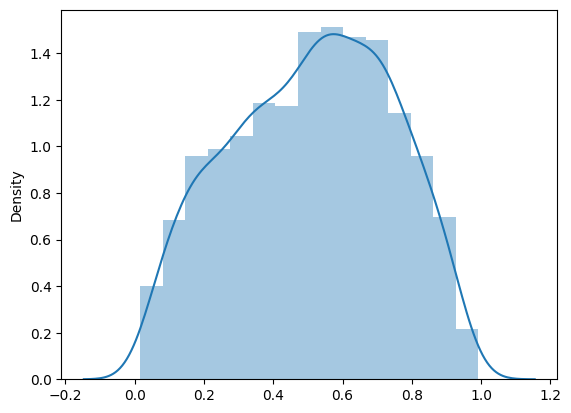

In [24]:
sns.distplot(result)